In [1]:
from google.colab import drive
drive.mount('/content/drive')
ROOT_PATH = "/content/drive/Shareddrives/DLAV"

Mounted at /content/drive


In [2]:
ROOT_PATH = "/content/drive/Shareddrives/DLAV"

In [3]:
import json 
import os
import sys
import numpy as np

%load_ext autoreload
%autoreload 2
sys.path.append(ROOT_PATH)
sys.path.append(os.path.join(ROOT_PATH,"utils"))

file = os.path.join(ROOT_PATH,"dlav_data","annotations","apollo_keypoints_24_train.json")
if os.path.exists(file):
  with open(file, "r") as f:
    annot_dict = json.load(f)
else:
  raise ValueError("The given config file doesn't exist")

In [4]:
import visualizations as viz
from openpifpaf_helper import *

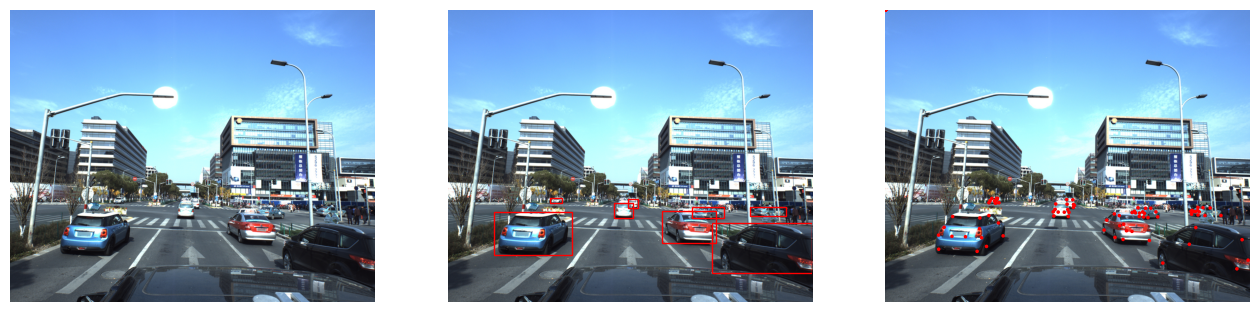

In [5]:
viz.plot_keypoints_and_bounding_box(34630104,annot_dict,ROOT_PATH)

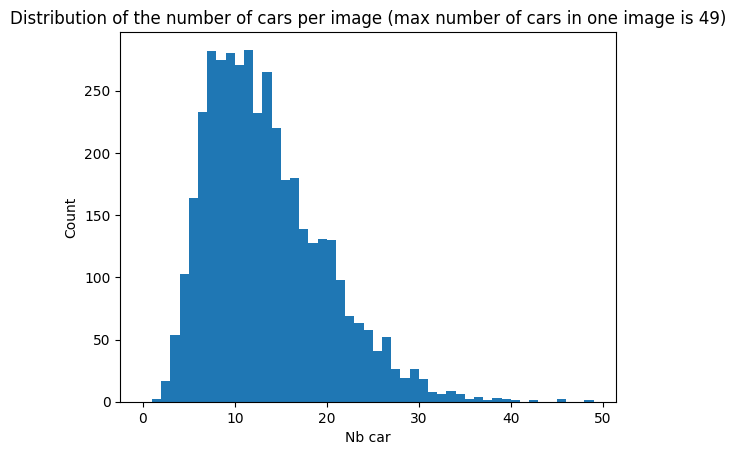

In [6]:
from eda import *
car_distrib = get_nb_car_distribution(annot_dict)
max_nb = max(car_distrib)
viz.plot_distribution(car_distrib,f"Distribution of the number of cars per image (max number of cars in one image is {max_nb})","Nb car")


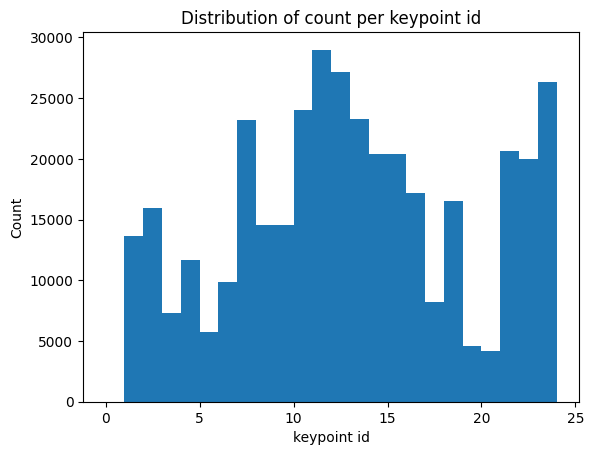

In [7]:

viz.plot_distribution(get_keypoint_class_distrib(annot_dict),"Distribution of count per keypoint id","keypoint id",bins=np.arange(25))


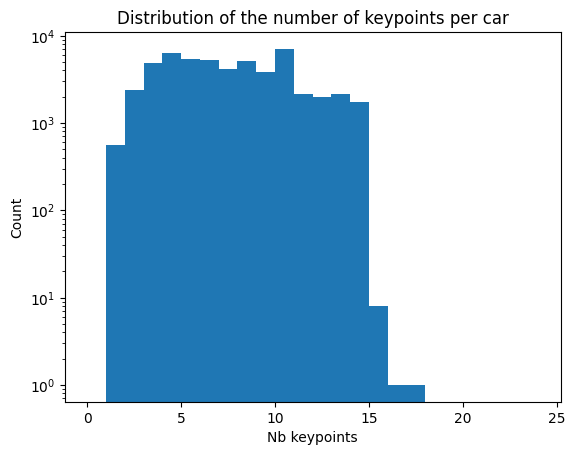

In [8]:
viz.plot_distribution(get_nb_keypoints_car_distribution(annot_dict),"Distribution of the number of keypoints per car","Nb keypoints",logy=True,bins=np.arange(25))


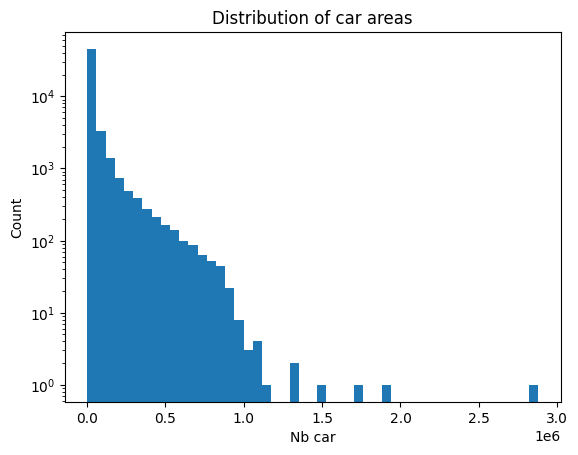

In [9]:
viz.plot_distribution(get_area_distribution(annot_dict),"Distribution of car areas","Nb car",logy=True)


In [12]:
DLAV_DATA = os.path.join(ROOT_PATH, "dlav_data")
NP_IMG_PATH = os.path.join(DLAV_DATA, "image_npz")
NP_SEGM_PATH = os.path.join(DLAV_DATA, "segm_npz")
IMG_FOLDER = os.path.join(ROOT_PATH,"3d-car-understanding-train","train","images")

In [14]:
import io
from os import listdir
from collections import Counter
from os.path import isfile, isdir, join
path = os.path.join(DLAV_DATA,"images")
if(isdir(path)):
  files = [f for f in listdir(path) if isfile(join(path, f))]
  count= Counter([f.split("_")[0] for f in files])
  set_files = set([f.split("_")[0] for f in files])
set_files,count

({'171206', '180114', '180116', '180117', '180118', '180310'},
 Counter({'180118': 542,
          '180310': 518,
          '180116': 1782,
          '180117': 1,
          '180114': 652,
          '171206': 788}))